<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод наименьших квадратов

In [1]:
import numpy as np

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
y1 = np.array([1,2,3,4,5])
y2 = np.array([1,1,4,9,0])

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

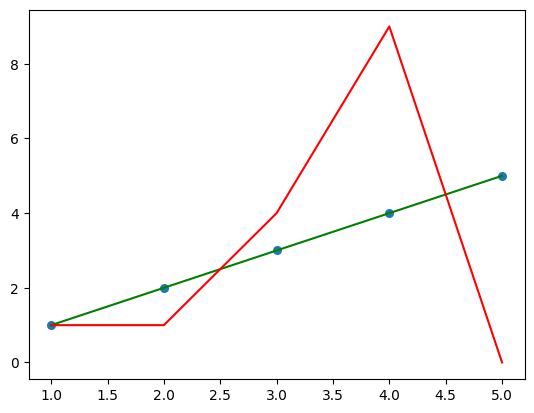

In [4]:
plt.scatter(x, y, s=30)
plt.plot(x, y1, 'g')
plt.plot(x, y2, 'r')
plt.show()

In [6]:
err1 = sum((y1 - y)**2)
err2 = sum((y2 - y)**2)

print(err1, err2)

0 52


### Минимизируем квадратичную функцию потерь, поэтому метод наименьших квадратов

### Мультиколлениарность - тесная корреляционная связь между выбранными признаками
### Абсолютная - определитель Xт*X равен 0
### Частичная - определитель Xт*X мало отличен от 0

### Устранение:
- Произвести отбор признаков;
- Преобразовать признаки;
- Получить смещенные оценки;**Текст, выделенный полужирным шрифтом**

### Пример:
| X1 | X2 | Y  |
|----|----|----|
| 1  | 2  | 6  |
| 2  | 4  | 11 |
| 3  | 6  | 16 |
| 4  | 8  | 21 |
| 5  | 10 | 26 |

n = 5, k = 2

#### Искомая функция y1 = w0 + w1*x1 + w2*x2
#### Найти: w0, w1, w2
#### Дополним матрицу признаков фиктивным признаком(Получим матрицу X):
| X0 | X1 | X2 |
|----|----|----|
| 1  | 1  | 2  |
| 1  | 2  | 4  |
| 1  | 3  | 6  |
| 1  | 4  | 8  |
| 1  | 5  | 10 |

#### Транспонируем(Xт):
| 1 | 1 | 1 | 1 | 1  |
|---|---|---|---|----|
| 1 | 2 | 3 | 4 | 5  |
| 2 | 4 | 6 | 8 | 10 |

#### Перемножаем матрицы(Xт*X):
| 5  | 15  | 30  |
|----|-----|-----|
| 15 | 55  | 110 |
| 30 | 110 | 220 |

#### Определитель матрицы равен 0, тогда дополним матрицу с помощью aI, a = 0.1(обычно a от 0.1 до 0.4):

#### Матрица I:
| 1 | 0 | 0 |
|---|---|---|
| 0 | 1 | 0 |
| 0 | 0 | 1 |

#### Матрица aI:
| 0.1 | 0   | 0   |
|-----|-----|-----|
| 0   | 0.1 | 0   |
| 0   | 0   | 0.1 |

### Матрица Xт*X + aI:
| 5.1 | 15   | 30    |
|-----|------|-------|
| 15  | 55.1 | 110   |
| 30  | 110  | 220.1 |

#### Определитель этой матрицы равен 27.8

#### Обартная матрица к матрице Xт*X + aI:
| 0.989  | -0.053 | -0.107 |
|--------|--------|--------|
| -0.053 | 8.003  | -3.992 |
| -0.107 | -3.992 | 2.014  |

#### Матрица Xт*Y:
| 80  |
|-----|
| 290 |
| 580 |

#### w = обратная матрица * Xт*Y:
| 0.928 |
|-------|
| 1.003 |
| 2.007 |

#### y1 = 0.9*1 + 1*x1 + 2*x2 = 0.9 + x1 + 2*x2
#### x2 = 2 * x1 -> y1 = 0.9 + 5*x1

## Обучение модели sklearn

### Линейная зависимость

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
np.random.seed(0)
x = np.random.rand(1000, 1)
y = 1 + 3*x + np.random.randn(1000, 1)
d = {
  'x': x.reshape(1, 1000)[0],
  'y': y.reshape(1, 1000)[0]
}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,2.544743
1,0.715189,3.164847
2,0.602763,4.657881
3,0.544883,2.420483
4,0.423655,1.771948


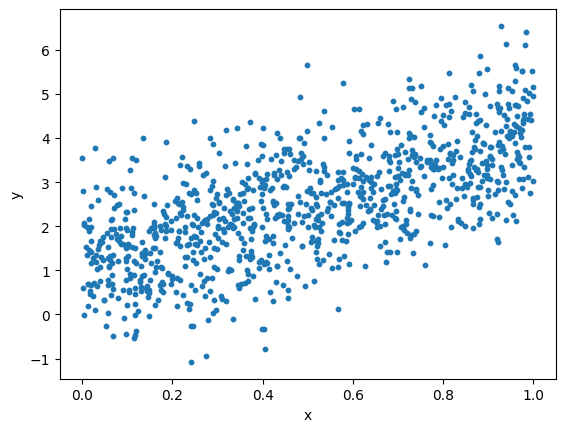

In [11]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=123)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [15]:
print(f'w0: {model.intercept_} | w1: {model.coef_}')

w0: [1.08258227] | w1: [[2.84716323]]


In [16]:
y_predict_train = model.predict(train[['x']])
print(y_predict_train[:, 0][:10])  # Полученные предикты модели

[1.78985595 1.45860173 2.99601208 2.15810342 3.66369375 1.16785573
 1.80559558 1.45979619 1.11593418 2.08447907]


In [17]:
y_predict_train_formula = model.intercept_ + model.coef_*train[['x']]
print(y_predict_train_formula[:10])  # Результаты с помощь формулы и найденных коэффициентов

            x
498  1.789856
243  1.458602
314  2.996012
202  2.158103
300  3.663694
682  1.167856
230  1.805596
306  1.459796
166  1.115934
620  2.084479


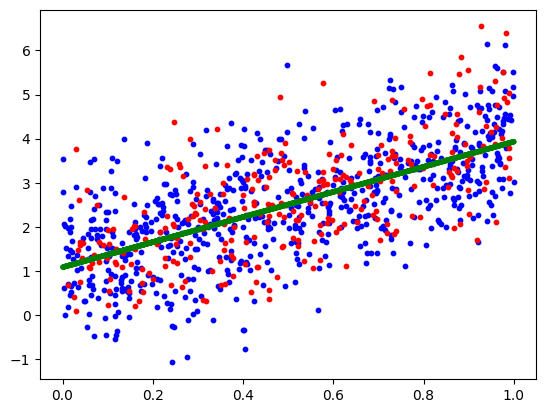

In [18]:
plt.plot(train['x'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.show()

In [19]:
y_predict_test = model.predict(test[['x']])

In [20]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print(train_mse)
print(test_mse)

0.9599829425512107
0.8715242272540316


In [24]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print(train_mae)
print(test_mae)

0.7845720071057997
0.7261670560834567


### Нелинейная зависимость

In [25]:
np.random.seed(0)
x = np.random.rand(1000, 1)
y = 1 + 3*np.log(x) + np.random.randn(1000, 1)
d = {
  'x': x.reshape(1, 1000)[0],
  'y': y.reshape(1, 1000)[0]
}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,-0.901687
1,0.715189,0.013656
2,0.602763,1.330900
3,0.544883,-1.035718
4,0.423655,-2.075526


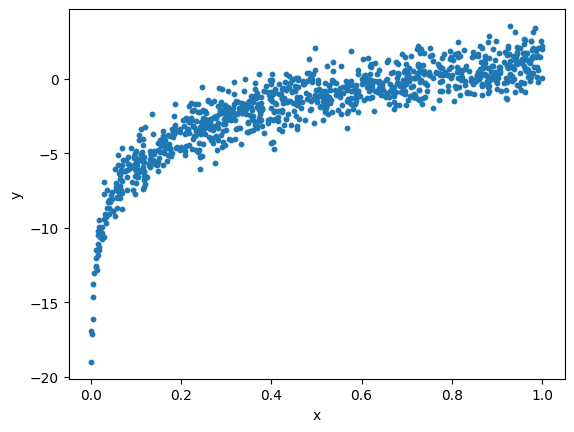

In [26]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [28]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [29]:
y_predict_train = model.predict(train[['x']])
y_predict_test = model.predict(test[['x']])

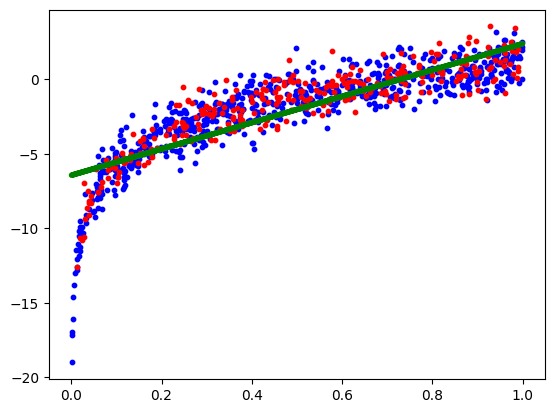

In [30]:
plt.plot(train['x'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.show()

In [31]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print(train_mse)
print(test_mse)

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print(train_mae)
print(test_mae)

3.137684915760023
1.9666504105743103
1.2394688443948811
1.0749333352063293


In [32]:
# Улучшим модель, добавив логарифм от х
df['x2'] = df['x'].apply(lambda x: np.log(x))

In [33]:
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [34]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [35]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

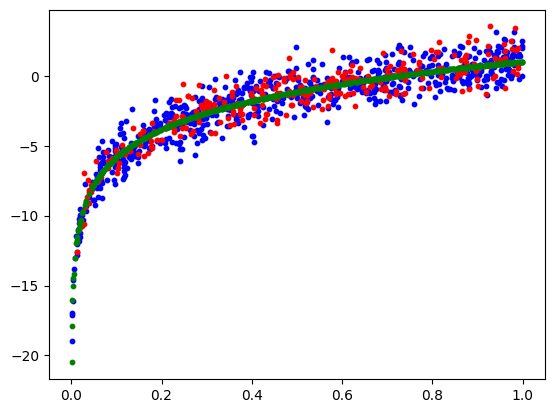

In [38]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.show()

In [39]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print(train_mse)
print(test_mse)

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print(train_mae)
print(test_mae)

0.9500342328699919
0.8666177085273008
0.7802681943269093
0.7283304269248565
